# Autoencoders

The `15_autoencoders` notebook explores the architecture and training of autoencoders, which are neural networks designed to learn compressed representations of data in an unsupervised manner. This notebook covers preparing the dataset, building the Encoder and Decoder models, and combining them into an Autoencoder. 

It also focuses on training the model, visualizing reconstructed outputs, exploring the learned latent space, and experimenting with the size of the latent dimension to understand its impact on reconstruction quality.

## Table of contents

1. [Understanding Autoencoders](#understanding-autoencoders)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Building the Encoder model](#building-the-encoder-model)
5. [Building the Decoder model](#building-the-decoder-model)
6. [Combining Encoder and Decoder into an Autoencoder](#combining-encoder-and-decoder-into-an-autoencoder)
7. [Training the Autoencoder](#training-the-autoencoder)
8. [Visualizing reconstructed outputs](#visualizing-reconstructed-outputs)
9. [Exploring the learned latent space](#exploring-the-learned-latent-space)
10. [Experimenting with latent dimension size](#experimenting-with-latent-dimension-size)

## Understanding Autoencoders

Autoencoders are a type of neural network used for unsupervised learning, primarily for tasks such as dimensionality reduction, data compression, and feature extraction. The core idea is to learn a compressed representation of the input data that can be used to reconstruct the original input as accurately as possible. They are composed of two main components: the **encoder** and the **decoder**.

The encoder compresses the input data into a lower-dimensional representation, known as the **latent space** or **bottleneck**. The decoder then attempts to reconstruct the original data from this compressed representation. The goal is for the output to be as close as possible to the original input, allowing the network to learn meaningful features.

### **Why autoencoders?**

Autoencoders are valuable due to their ability to learn compact, efficient representations of data. This makes them useful for several applications, such as:
- **Dimensionality reduction**: Autoencoders reduce the number of features while preserving the most important information. This is similar to PCA (Principal Component Analysis) but with the flexibility of learning non-linear representations.
- **Denoising**: They can be trained to remove noise from data by learning to map noisy inputs to clean outputs.
- **Anomaly detection**: Autoencoders can identify unusual data by learning the normal patterns in a dataset. When an input doesn't fit the learned patterns, the reconstruction error will be high, signaling a potential anomaly.

### **Key components of autoencoders**

Autoencoders consist of two parts:

#### **Encoder**
The encoder compresses the input data into a lower-dimensional latent space. This is typically done through a series of neural network layers that progressively reduce the dimensionality of the input. The encoder learns to represent the data in a more compact form while retaining important information. 

#### **Decoder**
The decoder reconstructs the input data from the compressed latent representation. It uses the information encoded in the latent space to generate an approximation of the original input. The decoder is typically a mirror image of the encoder, with layers that progressively increase the dimensionality back to the original input size.

The primary objective of an autoencoder is to minimize the difference between the input and the reconstructed output, forcing the network to learn a meaningful and efficient representation.

### **Training process**

Autoencoders are trained in an unsupervised manner. The model learns by comparing the original input to its reconstructed output and minimizing the reconstruction error. Both the encoder and decoder are updated during training to improve their ability to compress and reconstruct the data. Over time, the encoder becomes better at capturing essential features, while the decoder improves in reconstructing the data from these features.

### **Types of autoencoders**

Several variants of autoencoders have been developed to handle different tasks and challenges:

#### **Undercomplete autoencoder**
In an undercomplete autoencoder, the latent space has fewer dimensions than the input data. This forces the model to learn compressed, informative representations, making it useful for dimensionality reduction.

#### **Overcomplete autoencoder**
Overcomplete autoencoders have a latent space larger than the input space. These autoencoders risk learning trivial solutions, such as copying the input to the output. To prevent this, regularization techniques are used to ensure the model learns meaningful representations rather than simply reproducing the input.

#### **Denoising autoencoder**
Denoising autoencoders are designed to remove noise from data. The input is intentionally corrupted with noise, and the autoencoder is tasked with reconstructing the clean version of the data. This helps the model learn robust features that capture the essential structure of the data.

#### **Sparse autoencoder**
Sparse autoencoders introduce a sparsity constraint on the latent representation, encouraging the model to activate only a few neurons at a time. This promotes the learning of more interpretable and meaningful representations. Sparse autoencoders are particularly useful for feature extraction.

#### **Variational autoencoder (VAE)**
Variational autoencoders are a probabilistic extension of autoencoders. Instead of mapping the input to a fixed vector, the encoder learns a distribution, allowing the model to generate new data by sampling from this distribution. VAEs are widely used for generative tasks, as they can create new data that resembles the input data.

### **Bottleneck and latent space**

The bottleneck, or latent space, is the compressed representation learned by the encoder. The size of the bottleneck determines how much information can be captured and compressed. A smaller bottleneck forces the model to focus on the most important features, while a larger bottleneck allows more information to be retained, but risks overfitting or learning trivial mappings.

The latent space can be used for various downstream tasks, such as data visualization, clustering, or generating new samples in the case of VAEs.

### **Applications of autoencoders**

Autoencoders are widely used in a variety of applications, including:

- **Dimensionality reduction**: By compressing data into a smaller latent space, autoencoders can reduce the number of features while preserving essential information. This is helpful for simplifying high-dimensional datasets.
- **Denoising**: Denoising autoencoders are used to clean data, such as images or signals, by learning to remove noise while preserving the underlying structure.
- **Anomaly detection**: Autoencoders can be trained on normal data to detect anomalies. Data that deviates from normal patterns will result in high reconstruction errors, signaling that it may be anomalous.
- **Generative modeling**: Variational autoencoders (VAEs) can be used to generate new data by sampling from the latent space, making them useful for tasks like image or text generation.

### **Maths**

#### **Encoder and decoder mappings**

Autoencoders consist of two key components: the encoder and the decoder. The encoder compresses the input into a lower-dimensional latent space, and the decoder reconstructs the original input from this compressed representation. Formally, these two functions can be described as:

- **Encoder**: The encoder maps the input $ x $ into a latent representation $ z $, where $ f(x) $ represents the encoding function. Mathematically, the encoder performs:

  $$
  z = f(x) = \sigma(W_{\text{enc}} x + b_{\text{enc}})
  $$

  Here:
  - $ W_{\text{enc}} $ and $ b_{\text{enc}} $ are the weight matrix and bias of the encoder, respectively.
  - $ \sigma $ is an activation function, typically a non-linear function like ReLU or sigmoid.

- **Decoder**: The decoder takes the latent representation $ z $ and maps it back to a reconstruction $ \hat{x} $, where $ g(z) $ represents the decoding function. Mathematically, the decoder performs:

  $$
  \hat{x} = g(z) = \sigma(W_{\text{dec}} z + b_{\text{dec}})
  $$

  Here:
  - $ W_{\text{dec}} $ and $ b_{\text{dec}} $ are the weight matrix and bias of the decoder.

#### **Loss function and reconstruction error**

The main objective of an autoencoder is to minimize the reconstruction error, which is the difference between the original input $ x $ and its reconstruction $ \hat{x} $. A common loss function for this purpose is the **mean squared error (MSE)**, which measures the average squared difference between the input and the reconstructed output:

$$
L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

where:
- $ x_i $ and $ \hat{x}_i $ are the individual elements of the input and reconstructed vectors, respectively.
- $ n $ is the number of elements in the input.

For tasks involving binary data, the **binary cross-entropy loss** is often used:

$$
L(x, \hat{x}) = -\sum_{i=1}^{n} \left[ x_i \log(\hat{x}_i) + (1 - x_i) \log(1 - \hat{x}_i) \right]
$$

The goal is to minimize this loss function during training, such that the reconstructed output becomes as close to the input as possible.

#### **Training via backpropagation**

Autoencoders are trained using backpropagation, where the goal is to minimize the reconstruction error. Both the encoder and decoder have their parameters (weights and biases) updated using gradient descent. The gradients of the loss function are computed with respect to these parameters, and the weights are updated as follows:

$$
W_{\text{new}} = W_{\text{old}} - \eta \frac{\partial L}{\partial W}
$$

where:
- $ \eta $ is the learning rate.
- $ \frac{\partial L}{\partial W} $ is the gradient of the loss function with respect to the weight matrix $ W $.

#### **Dimensionality reduction and bottleneck**

In an undercomplete autoencoder, the dimensionality of the latent space $ z $ is smaller than the input space. This bottleneck forces the network to compress the input data and capture the most important features. The encoder learns a lower-dimensional representation that retains the most relevant information, while the decoder learns to reconstruct the input from this compressed representation.

The key challenge is that the autoencoder must learn to extract meaningful features while preserving enough information for accurate reconstruction, which is where the size of the bottleneck plays a critical role.

#### **Regularization techniques**

Autoencoders often incorporate regularization techniques to prevent overfitting and encourage learning of meaningful features.

- **Sparse autoencoders** introduce a sparsity constraint on the activations in the latent space. This is typically done by adding a regularization term to the loss function, penalizing the network if too many neurons in the latent space are active at once. A common regularization technique is the **L1 penalty**, which encourages the network to keep most activations close to zero:

  $$
  L_{\text{regularized}} = L(x, \hat{x}) + \lambda \sum_{i=1}^{k} |z_i|
  $$

  where $ z_i $ represents the activations in the latent space and $ \lambda $ is a regularization parameter that controls the strength of the sparsity constraint.

- **Denoising autoencoders** add noise to the input during training but require the network to reconstruct the clean, original input. The corruption process can be Gaussian noise, salt-and-pepper noise, or dropout. The denoising process forces the autoencoder to learn robust features that are less sensitive to small perturbations in the input.

#### **Variational autoencoders (VAE)**

Variational autoencoders (VAEs) introduce a probabilistic element to autoencoders by learning a distribution over the latent space rather than a fixed vector. The encoder maps the input to a distribution, typically a Gaussian, characterized by a mean $ \mu $ and a variance $ \sigma^2 $. During training, the model learns these parameters and samples from the latent distribution to reconstruct the input.

The VAE introduces two loss components:
1. **Reconstruction loss**, which measures how well the decoder reconstructs the input from the sampled latent vector.
2. **KL-divergence**, a regularization term that measures the difference between the learned latent distribution and a prior distribution (usually a standard Gaussian):

$$
L_{\text{VAE}} = L_{\text{reconstruction}} + \text{KL-divergence}
$$

The KL-divergence term ensures that the latent space follows a smooth, continuous distribution, allowing the model to generate new data by sampling from the latent space.

#### **Gradient flow in VAEs**

In a VAE, the backpropagation process involves computing gradients with respect to both the reconstruction loss and the KL-divergence term. The gradients of the reconstruction loss update the weights of the decoder, while the KL-divergence gradients affect the encoder by shaping the learned latent distribution. The VAE leverages the **reparameterization trick** to ensure that gradients can flow through the stochastic sampling step, allowing the encoder to be trained via backpropagation.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for building and training autoencoders in PyTorch?**


In [3]:
# !!pip install torch torchvision matplotlib scikit-learn

##### **Q2: How do you import the required modules for model building, training, and data handling in PyTorch?**


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

##### **Q3: How do you set up your environment to use GPU, and how do you fallback to CPU in PyTorch?**


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


##### **Q4: How do you set a random seed in PyTorch to ensure reproducibility during autoencoder training?**

In [6]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

## Preparing the dataset


##### **Q5: How do you load a dataset using PyTorch's `torchvision.datasets`?**


In [7]:
from torchvision.datasets import Caltech101

data_root = './data'
caltech_data = Caltech101(root=data_root, download=True)

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=ce6fdd2d-c0f6-4821-88dc-ed5d355c5772
To: /home/fellmir/git/pyTorchBasis/01-intermediate-projects/data/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:06<00:00, 19.0MB/s] 


Extracting ./data/caltech101/101_ObjectCategories.tar.gz to ./data/caltech101


Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=8dcdb0bf-0282-47fb-a735-1be8a2138c2e
To: /home/fellmir/git/pyTorchBasis/01-intermediate-projects/data/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 15.2MB/s]


Extracting ./data/caltech101/Annotations.tar to ./data/caltech101


##### **Q6: How do you apply transformations such as normalization to prepare the dataset for training the autoencoder?**


In [20]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Lambda(lambda img: img.convert('RGB')),  # Ensure image is in RGB format
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])

caltech_data = Caltech101(root=data_root, transform=transform, download=True)

Files already downloaded and verified


##### **Q7: How do you create a DataLoader in PyTorch to load batches of data for training the autoencoder?**


In [21]:
batch_size = 64
data_loader = DataLoader(caltech_data, batch_size=batch_size, shuffle=True)

##### **Q8: How do you split the dataset into training and validation sets using PyTorch?**

In [22]:
dataset_size = len(caltech_data)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

train_dataset, val_dataset = torch.utils.data.random_split(caltech_data, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Building the Encoder model


##### **Q9: How do you define the architecture of the Encoder model using PyTorch’s `nn.Module`?**


In [11]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),  # Output: (16, 64, 64)
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),  # Output: (64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),  # Output: (128, 8, 8)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, latent_dim)
        )

    def forward(self, x):
        return self.encoder(x)

##### **Q10: How do you implement the forward pass of the Encoder to map input data into a latent representation?**


In [12]:
# See forward pass above, i.e.,
# def forward(self, x):
#     return self.encoder(x)

##### **Q11: How do you specify the latent dimension size when building the Encoder?**

In [13]:
latent_dim = 128  # Specify latent dimension size when initializing the Encoder
encoder = Encoder(latent_dim)

## Building the Decoder model


##### **Q12: How do you define the architecture of the Decoder model using PyTorch’s `nn.Module`?**


In [14]:
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),  # Output: (64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # Output: (16, 64, 64)
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),   # Output: (3, 128, 128)
            nn.Tanh()
        )

    def forward(self, x):
        return self.decoder(x)

##### **Q13: How do you implement the forward pass of the Decoder to reconstruct the original data from the latent representation?**


In [15]:
# See forward pass above, i.e.,
# def forward(self, x):
#     return self.decoder(x)

##### **Q14: How do you apply an activation function in the Decoder to ensure the output values are within the same range as the input data?**

In [16]:
# Applied nn.Tanh() as the final activation function in the Decoder

## Combining Encoder and Decoder into an Autoencoder


##### **Q15: How do you combine the Encoder and Decoder models into a single autoencoder architecture?**


In [17]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

##### **Q16: How do you implement the forward pass of the full autoencoder by chaining the Encoder and Decoder together?**


In [18]:
# See forward pass above, i.e.,
# def forward(self, x):
#     z = self.encoder(x)
#     x_recon = self.decoder(z)
#     return x_recon

##### **Q17: How do you verify the dimensions of the input and output to ensure the autoencoder is reconstructing the data correctly?**

In [23]:
model = Autoencoder(latent_dim).to(device)

inputs, _ = next(iter(train_loader))  # Get a batch of data
inputs = inputs.to(device)

outputs = model(inputs)  # Forward pass

print('Input shape:', inputs.shape)
print('Output shape:', outputs.shape)

Input shape: torch.Size([64, 3, 128, 128])
Output shape: torch.Size([64, 3, 128, 128])


## Training the Autoencoder


##### **Q18: How do you define the loss function (e.g., Mean Squared Error) to measure the reconstruction error in PyTorch?**


In [24]:
criterion = nn.MSELoss()

##### **Q19: How do you configure an optimizer (e.g., Adam) to update the model parameters during training?**


In [25]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

##### **Q20: How do you implement a training loop that performs forward pass, loss calculation, and backpropagation for the autoencoder?**


In [26]:
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, _ in train_loader:
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}')

Epoch 1/20, Loss: 0.2716
Epoch 2/20, Loss: 0.1243
Epoch 3/20, Loss: 0.1007
Epoch 4/20, Loss: 0.0853
Epoch 5/20, Loss: 0.0750
Epoch 6/20, Loss: 0.0695
Epoch 7/20, Loss: 0.0653
Epoch 8/20, Loss: 0.0623
Epoch 9/20, Loss: 0.0600
Epoch 10/20, Loss: 0.0583
Epoch 11/20, Loss: 0.0564
Epoch 12/20, Loss: 0.0552
Epoch 13/20, Loss: 0.0539
Epoch 14/20, Loss: 0.0527
Epoch 15/20, Loss: 0.0518
Epoch 16/20, Loss: 0.0510
Epoch 17/20, Loss: 0.0505
Epoch 18/20, Loss: 0.0496
Epoch 19/20, Loss: 0.0493
Epoch 20/20, Loss: 0.0483


##### **Q21: How do you monitor and log the training loss over epochs to ensure the autoencoder is learning correctly?**

In [27]:
# Loss is already printed after each epoch in the training loop above, and stored in train_losses list for further analysis or plotting

## Visualizing reconstructed outputs


##### **Q22: How do you visualize the original input images alongside the reconstructed outputs generated by the autoencoder?**


Original Images


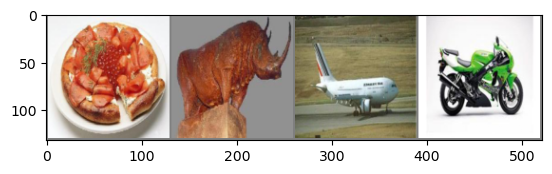

Reconstructed Images


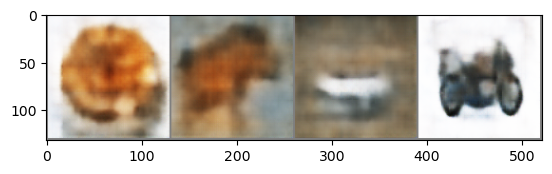

In [28]:
model.eval()
with torch.no_grad():
    inputs, _ = next(iter(val_loader))
    inputs = inputs.to(device)
    outputs = model(inputs)
    inputs = inputs.cpu()
    outputs = outputs.cpu()

def imshow(img):  # Function to unnormalize and show images
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

print('Original Images')
imshow(torchvision.utils.make_grid(inputs[:4]))

print('Reconstructed Images')
imshow(torchvision.utils.make_grid(outputs[:4]))

##### **Q23: How do you save and display the reconstructed images from the validation set after each training epoch?**

In [29]:
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, _ in train_loader:
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}')
    
    model.eval()
    with torch.no_grad():
        inputs, _ = next(iter(val_loader))
        inputs = inputs.to(device)
        outputs = model(inputs)
        inputs = inputs.cpu()
        outputs = outputs.cpu()
        torchvision.utils.save_image(outputs[:4], f'reconstructed_epoch_{epoch+1}.png')  # Save reconstructed images

Epoch 1/5, Loss: 0.0479
Epoch 2/5, Loss: 0.0475
Epoch 3/5, Loss: 0.0470
Epoch 4/5, Loss: 0.0471
Epoch 5/5, Loss: 0.0458


## Exploring the learned latent space


##### **Q24: How do you extract the latent representations of input data from the Encoder?**


In [30]:
model.eval()
with torch.no_grad():
    inputs, labels = next(iter(val_loader))
    inputs = inputs.to(device)
    z = model.encoder(inputs)

##### **Q25: How do you visualize the latent space using techniques such as t-SNE or PCA to explore the structure of the encoded data?**

In [31]:
# Extract latent representations:
latents = []
labels_list = []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        z = model.encoder(inputs)
        latents.append(z.cpu())
        labels_list.extend(labels)
latents = torch.cat(latents).numpy()
labels = np.array(labels_list)

tsne = TSNE(n_components=2, random_state=42)
latents_tsne = tsne.fit_transform(latents)  # Apply t-SNE

pca = PCA(n_components=2)
latents_pca = pca.fit_transform(latents)  # Apply PCA

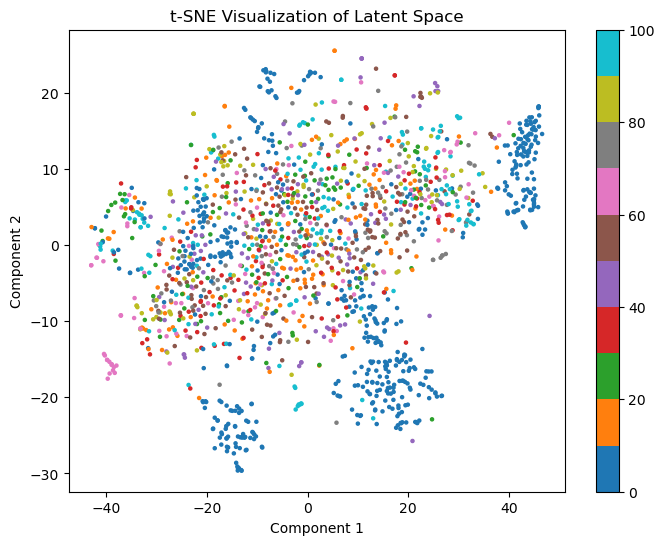

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(latents_tsne[:, 0], latents_tsne[:, 1], c=labels, cmap='tab10', s=5)
plt.colorbar()
plt.title('t-SNE Visualization of Latent Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

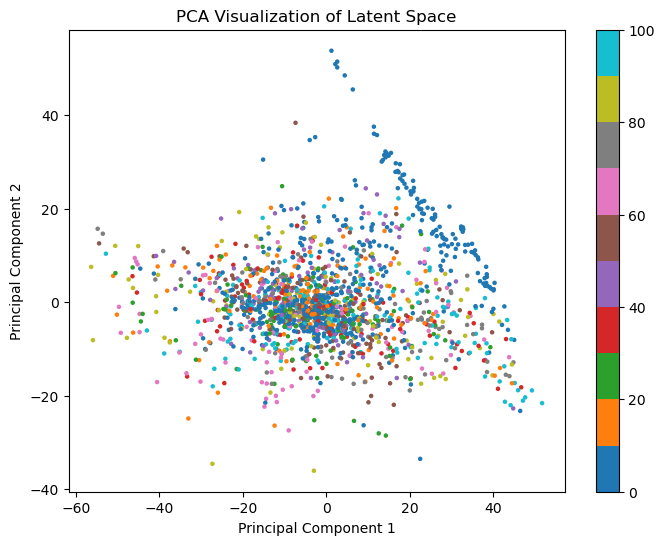

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(latents_pca[:, 0], latents_pca[:, 1], c=labels, cmap='tab10', s=5)
plt.colorbar()
plt.title('PCA Visualization of Latent Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Experimenting with latent dimension size


##### **Q26: How do you modify the latent dimension size and observe its impact on the quality of the reconstructed images?**


In [34]:
def train_autoencoder(latent_dim, num_epochs=5):
    # Initialize the model with the specified latent dimension:
    model = Autoencoder(latent_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, _ in train_loader:
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)
        print(f'Latent Dim {latent_dim}, Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}')

    # Visualize reconstructed images:
    model.eval()
    with torch.no_grad():
        inputs, _ = next(iter(val_loader))
        inputs = inputs.to(device)
        outputs = model(inputs)
        inputs = inputs.cpu()
        outputs = outputs.cpu()

    # Show reconstructed images:
    print(f'Reconstructed Images with latent_dim={latent_dim}')
    imshow(torchvision.utils.make_grid(outputs[:4]))
    
    return train_losses

Latent Dim 16, Epoch 1/5, Loss: 0.2977
Latent Dim 16, Epoch 2/5, Loss: 0.1738
Latent Dim 16, Epoch 3/5, Loss: 0.1284
Latent Dim 16, Epoch 4/5, Loss: 0.1241
Latent Dim 16, Epoch 5/5, Loss: 0.1217
Reconstructed Images with latent_dim=16


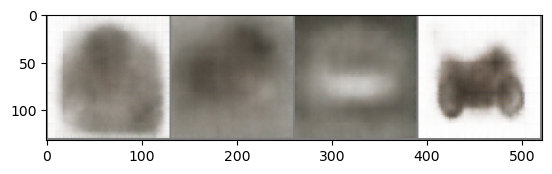

Latent Dim 32, Epoch 1/5, Loss: 0.2640
Latent Dim 32, Epoch 2/5, Loss: 0.1355
Latent Dim 32, Epoch 3/5, Loss: 0.1160
Latent Dim 32, Epoch 4/5, Loss: 0.1078
Latent Dim 32, Epoch 5/5, Loss: 0.1038
Reconstructed Images with latent_dim=32


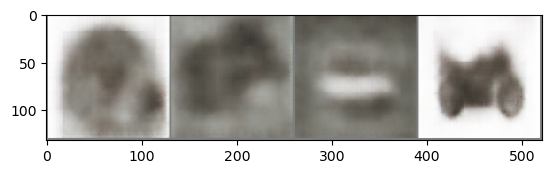

Latent Dim 64, Epoch 1/5, Loss: 0.2676
Latent Dim 64, Epoch 2/5, Loss: 0.1259
Latent Dim 64, Epoch 3/5, Loss: 0.1068
Latent Dim 64, Epoch 4/5, Loss: 0.0985
Latent Dim 64, Epoch 5/5, Loss: 0.0936
Reconstructed Images with latent_dim=64


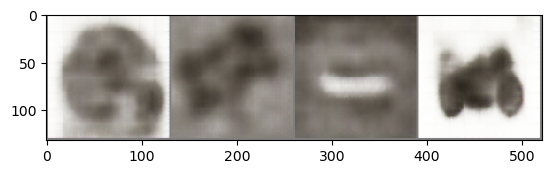

In [35]:
latent_dims = [16, 32, 64]
for latent_dim in latent_dims:
    train_autoencoder(latent_dim)

##### **Q27: How do you evaluate how different latent dimensions affect the autoencoder’s ability to capture the most important features of the data?**


Training Autoencoder with Latent Dimension: 16
Latent Dim 16, Epoch 1/5, Loss: 0.2661
Latent Dim 16, Epoch 2/5, Loss: 0.1444
Latent Dim 16, Epoch 3/5, Loss: 0.1289
Latent Dim 16, Epoch 4/5, Loss: 0.1250
Latent Dim 16, Epoch 5/5, Loss: 0.1229
Reconstructed Images with latent_dim=16


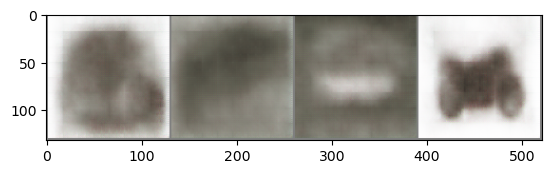


Training Autoencoder with Latent Dimension: 32
Latent Dim 32, Epoch 1/5, Loss: 0.2706
Latent Dim 32, Epoch 2/5, Loss: 0.1365
Latent Dim 32, Epoch 3/5, Loss: 0.1171
Latent Dim 32, Epoch 4/5, Loss: 0.1093
Latent Dim 32, Epoch 5/5, Loss: 0.1048
Reconstructed Images with latent_dim=32


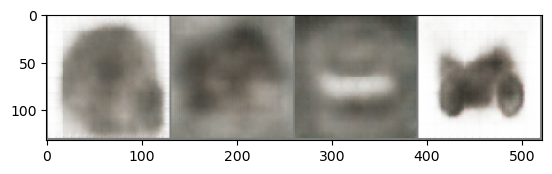


Training Autoencoder with Latent Dimension: 64
Latent Dim 64, Epoch 1/5, Loss: 0.2449
Latent Dim 64, Epoch 2/5, Loss: 0.1255
Latent Dim 64, Epoch 3/5, Loss: 0.1068
Latent Dim 64, Epoch 4/5, Loss: 0.0980
Latent Dim 64, Epoch 5/5, Loss: 0.0929
Reconstructed Images with latent_dim=64


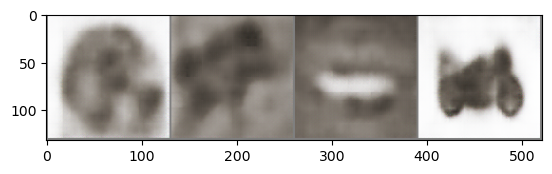

In [36]:
all_train_losses = {}
reconstructed_images = {}

for latent_dim in latent_dims:
    print(f'\nTraining Autoencoder with Latent Dimension: {latent_dim}')
    train_losses = train_autoencoder(latent_dim)
    all_train_losses[latent_dim] = train_losses
    
    with torch.no_grad():
        inputs, _ = next(iter(val_loader))
        inputs = inputs.to(device)
        outputs = model(inputs)
        reconstructed_images[latent_dim] = outputs.cpu()  # Save reconstructed images for comparison

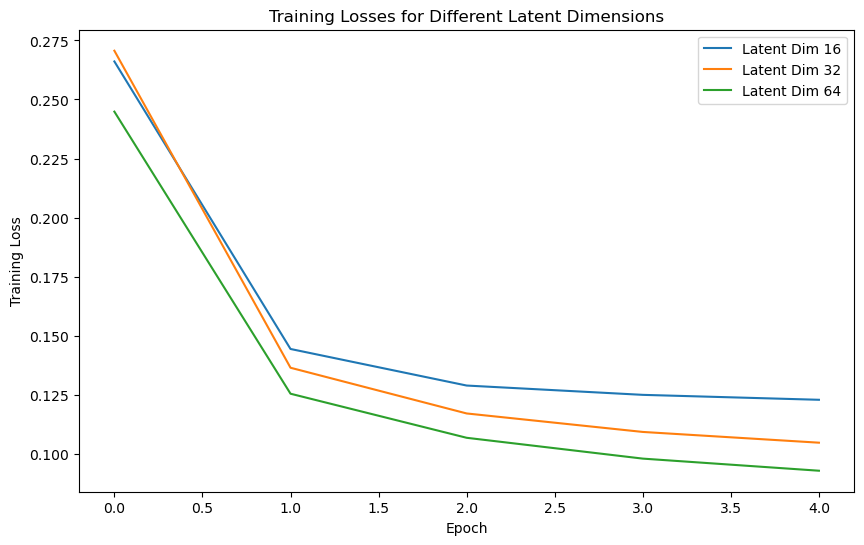

In [37]:
plt.figure(figsize=(10, 6))
for latent_dim, losses in all_train_losses.items():
    plt.plot(losses, label=f'Latent Dim {latent_dim}')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Losses for Different Latent Dimensions')
plt.legend()
plt.show()

In [38]:
def compare_reconstructions(reconstructed_images, original_images):
    plt.figure(figsize=(12, 8))
    for idx, latent_dim in enumerate(sorted(reconstructed_images.keys())):
        plt.subplot(2, len(reconstructed_images), idx + 1)
        img = reconstructed_images[latent_dim][0] * 0.5 + 0.5  # Unnormalize
        img = img.numpy().transpose(1, 2, 0)
        plt.imshow(img)
        plt.title(f'Latent Dim {latent_dim}')
        plt.axis('off')
    
    plt.subplot(2, len(reconstructed_images), len(reconstructed_images) + 1)
    img = original_images[0] * 0.5 + 0.5  # Unnormalize
    img = img.numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()  # Original image

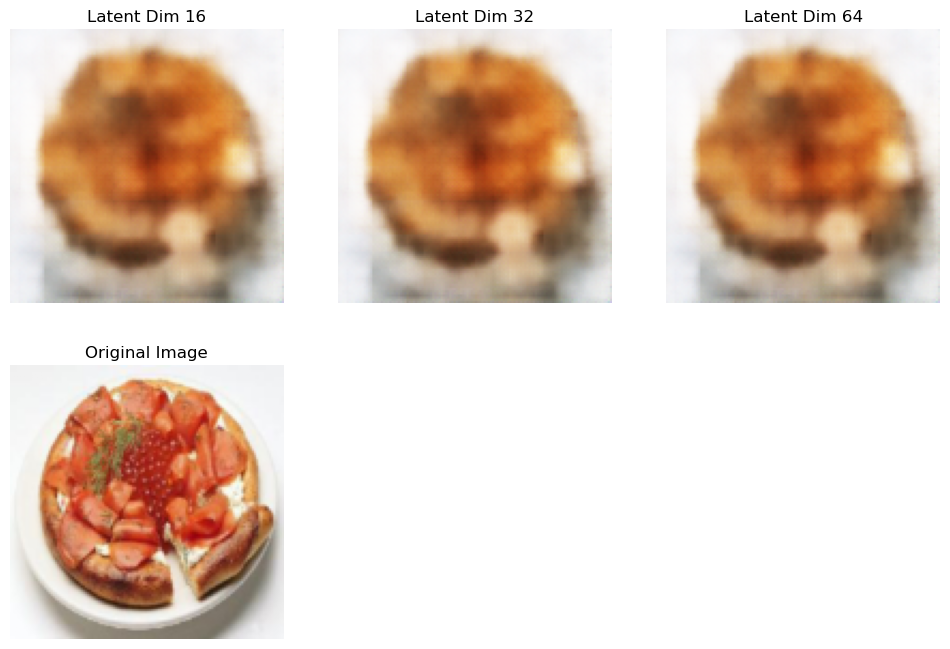

In [45]:
inputs, _ = next(iter(val_loader))
compare_reconstructions(reconstructed_images, inputs)

In [2]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' does not exist.


In [47]:
for i in range(1, 6):
    file_name = f'reconstructed_epoch_{i}.png'
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f'{file_name} deleted')
    else:
        print(f'{file_name} not found')

reconstructed_epoch_1.png deleted
reconstructed_epoch_2.png deleted
reconstructed_epoch_3.png deleted
reconstructed_epoch_4.png deleted
reconstructed_epoch_5.png deleted
